In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt



In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

col_names = None
data = pd.read_csv(url, header=None)

col_names = []
with pd.io.common.urlopen(names_url) as f:
    for line in f:
        decoded = line.decode('utf-8')
        if decoded.startswith('word_freq') or decoded.startswith('char_freq') or decoded.startswith('capital_run_length') or decoded.strip().startswith('spam'):
            name = decoded.split(':')[0].strip()
            col_names.append(name)
if len(col_names) == data.shape[1] - 1:
    col_names.append('spam')
elif len(col_names) == data.shape[1]:
    pass
else:
    col_names = ["f" + str(i) for i in range(data.shape[1])]
    col_names[-1] = 'spam'

data.columns = col_names

print("Dataset shape:", data.shape)
print(data.head())


Dataset shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...      

In [3]:
X = data.drop('spam', axis=1)
y = data['spam']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [6]:
clf = SVC(kernel='rbf', random_state=42)
clf.fit(X_train, y_train)


SVC(random_state=42)

In [7]:
y_pred = clf.predict(X_test)


In [8]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Accuracy: 0.9348298334540188

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       804
           1       0.95      0.89      0.92       577

    accuracy                           0.93      1381
   macro avg       0.94      0.93      0.93      1381
weighted avg       0.94      0.93      0.93      1381



In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0 (Not Spam)', 'Actual 1 (Spam)'],
                     columns=['Predicted 0', 'Predicted 1'])



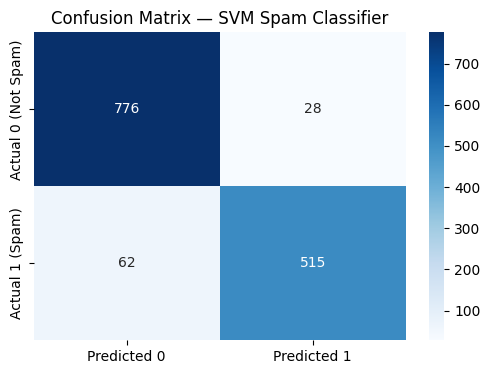

In [10]:
plt.figure(figsize=(6,4))
sn.heatmap(cm_df, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix — SVM Spam Classifier")
plt.show()

/tmp/ipython-input-2299935298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='spam', data=data, palette="Set2")


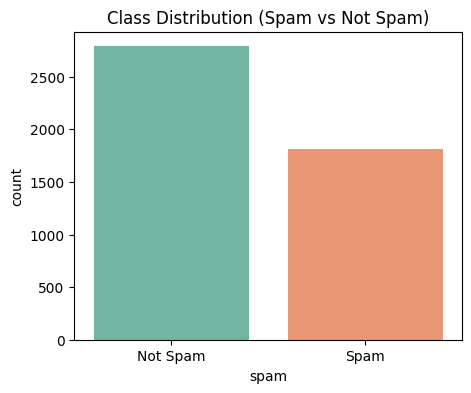

In [11]:
plt.figure(figsize=(5,4))
sn.countplot(x='spam', data=data, palette="Set2")
plt.title("Class Distribution (Spam vs Not Spam)")
plt.xticks([0,1], ["Not Spam", "Spam"])
plt.show()

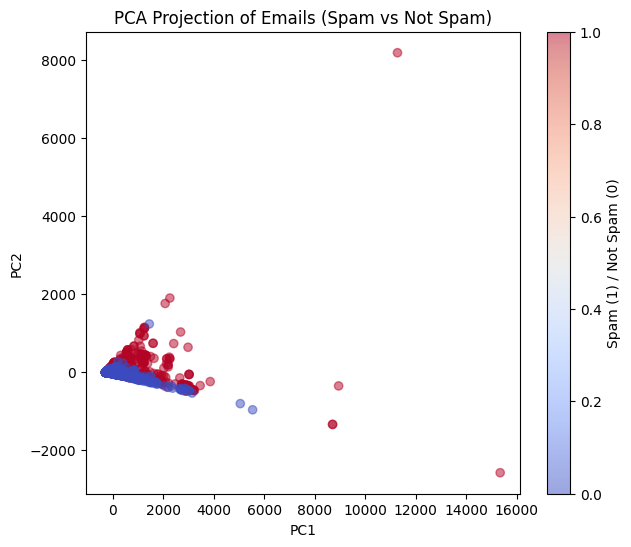

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.5)
plt.title("PCA Projection of Emails (Spam vs Not Spam)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Spam (1) / Not Spam (0)")
plt.show()